<a href="https://colab.research.google.com/github/gbouzioto/big_data_management_master_2021/blob/main/project_2/visualization/project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Statements

In [ ]:
import os
import zipfile

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

## File Download

In [ ]:
project_dir = os.path.join('/', 'content')
file_path = os.path.join(project_dir, 'results.zip')

if not os.path.isfile(file_path):
  # download file if not downloaded
  !gdown --id 1W7JoeHVsnjNyj9htCfNTIFgTamw65N1O
  with zipfile.ZipFile(file_path, 'r') as zip_ref:
      zip_ref.extractall(project_dir)

# filepaths
results_1 = os.path.join(project_dir, 'results_1.json')
results_2 = os.path.join(project_dir, 'results_2.json')
results_3 = os.path.join(project_dir, 'results_3.json')
results_4 = os.path.join(project_dir, 'results_4.json')
results_5 = os.path.join(project_dir, 'results_5.json')

## Query 1 visualization

In [ ]:
# load the json to pandas
df = pd.read_json(results_1)
df.head()

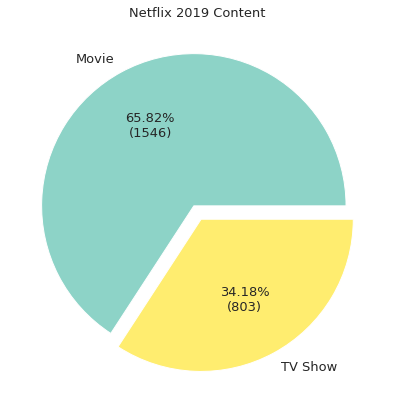

In [ ]:
def my_fmt(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

fig, ax = plt.subplots(1, 1, figsize=(11, 7)) # Select the appropriate size

total = len(df)
df['type'].value_counts().plot(kind='pie', explode=[0.05,0.05], autopct=my_fmt,
                               textprops={'size': 13}, ax=ax, colormap='Set3')

ax.set_title('Netflix 2019 Content', fontsize=13)
ax.set_ylabel('')


plt.show()

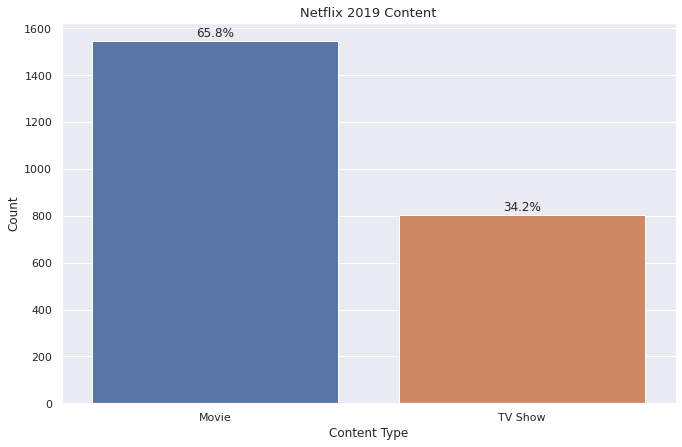

In [ ]:
# plot the number of shows and movies

plt.figure(figsize=(11, 7)) # Select the appropriate size

ax = sns.countplot(x='type', data=df)
ax.set_title('Netflix 2019 Content', fontsize=13)
ax.set_xlabel('Content Type')
ax.set_ylabel('Count')

total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=12)

plt.show()

## Query 2 visualization

In [ ]:
# load the json to pandas
df = pd.read_json(results_2)
df.head()

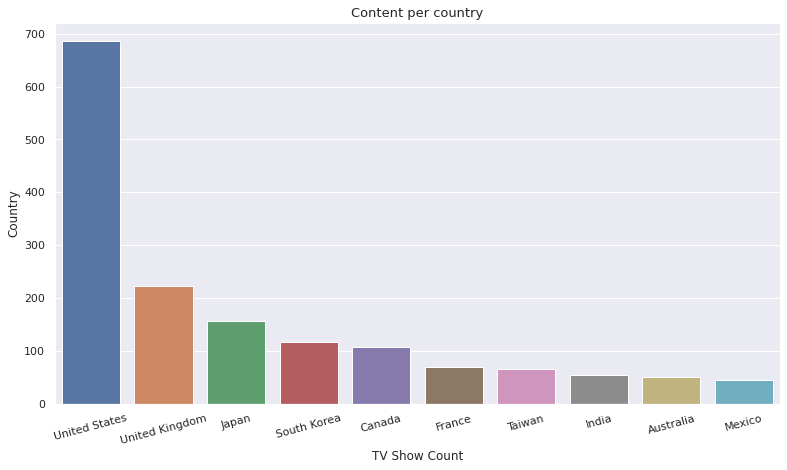

In [ ]:
# get top 10 countries
df_top = df.iloc[:10, :]

plt.figure(figsize=(13, 7)) # Select the appropriate size

# Plot results
ax = sns.barplot(data=df_top, x='country', y='country_count')
ax.set_title('Content per country', fontsize=13)
ax.set_xlabel('TV Show Count')
ax.set_ylabel('Country')
ax.set_xticklabels(ax.get_xticklabels(), rotation=15)

plt.show()

## Query 3 Visualization

In [ ]:
# load the json to pandas
df = pd.read_json(results_3)
df.head()

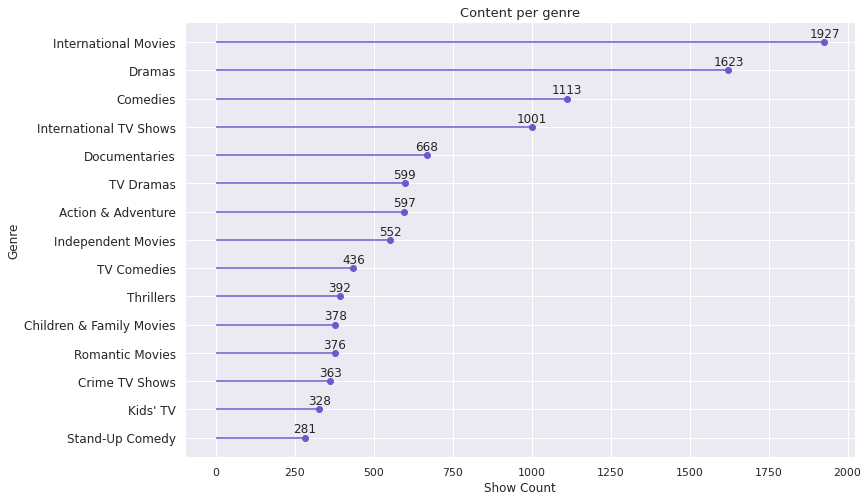

In [ ]:
# get top 15 genres
df_top = df.iloc[:15, :]
df_top = df_top[::-1].copy()

plt.figure(figsize=(12, 8)) # Select the appropriate size

# Plot results
plt.hlines(y=df_top['genre'], xmin=0, xmax=df_top['count'], color='slateblue')
plt.plot(df_top['count'], df_top['genre'], 'o', color='slateblue')
plt.title('Content per genre', fontsize=13)
plt.xlabel('Show Count')
plt.ylabel('Genre')
plt.yticks(size=12)

for x,y in zip(df_top['count'], df_top['genre']):
    plt.annotate('{:.0f}'.format(x), xy=(x,y), xytext=(0,5), textcoords='offset points',
                 ha='center', fontsize=12)


plt.show()

In [ ]:
# get top 15 genres
df_top = df.iloc[:15, :]

plt.figure(figsize=(10, 6)) # Select the appropriate size

# Plot results
ax = sns.barplot(data=df_top, y='genre', x='count')
ax.set_title('Content per genre')
ax.set_xlabel('Show Count')
ax.set_ylabel('Genre')


plt.show()

## Query 4 Visualization

In [ ]:
# load the json to pandas
df = pd.read_json(results_4)
df.head()

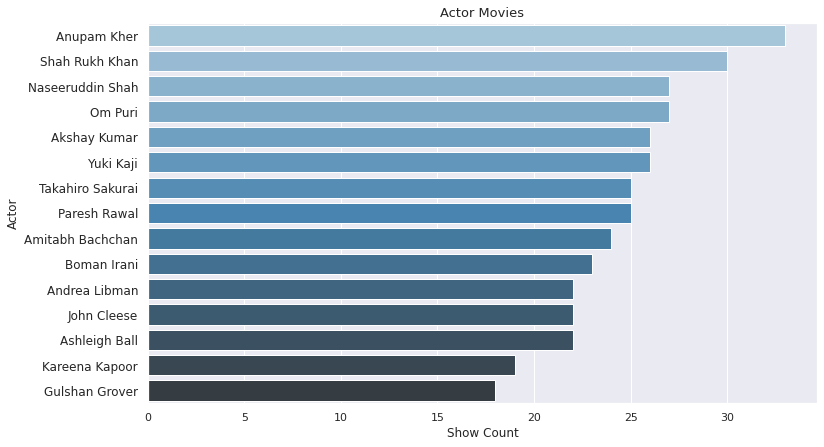

In [ ]:
# get top 15 actors
df_top = df.iloc[:15, :]

plt.figure(figsize=(12, 7)) # Select the appropriate size

# Plot results
ax = sns.barplot(data=df_top, y='actor', x='movie_count', palette="Blues_d")
ax.set_title('Actor Movies', fontsize=13)
ax.set_xlabel('Show Count')
ax.set_ylabel('Actor')
ax.set_yticklabels(ax.get_yticklabels(), size=12)

plt.show()

## Query 5 Visualization

In [ ]:
# load the json to pandas
df = pd.read_json(results_5)
df.head()

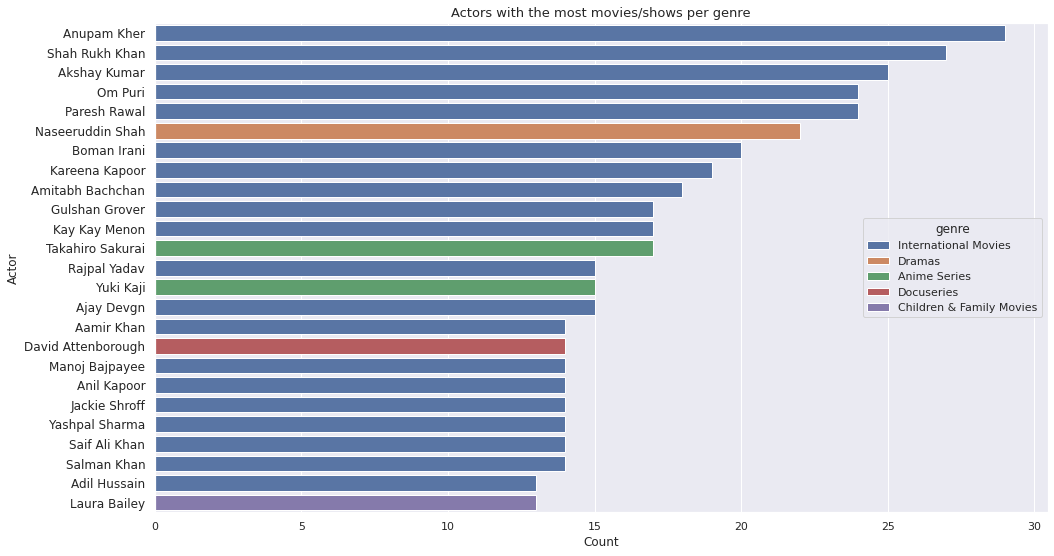

In [ ]:
# Get the 25 actors with the most movies per genre
df_top = df.sort_values('count', ascending=False).reset_index(drop=True)
df_top = df_top.iloc[:25]

# Plot results
plt.figure(figsize=(16, 9))

sns.barplot(data=df_top, y='actor', x='count', hue='genre', dodge=False)
plt.title('Actors with the most movies/shows per genre', fontsize=13)
plt.xlabel('Count')
plt.ylabel('Actor')
plt.yticks(size=12)

plt.show()